In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ETo-Qalu-PM/ETo_Qalu_PM.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [4]:
ETo_PM = pd.read_csv('/kaggle/input/ETo-Qalu-PM/ETo_Qalu_PM.csv')
ETo_PM.head()

,Date,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
0,1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1,1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
2,1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
3,1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
4,1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


In [5]:
ETo_PM .shape

(13969, 10)

In [6]:
ETo_PM.duplicated().sum()

89

In [7]:
ETo_PM.drop_duplicates(inplace=True)

In [8]:
ETo_PM.isna().sum()

Date             1
PP_mm            1
Tmean_c          1
Tmax_c           1
Tmin-c           1
Rhmean_%         1
SRTOA_MJ/m2/d    1
SRSFC_MJ/m2/d    1
WND_m/s          1
PM_ET0_mm        1
dtype: int64

In [9]:
ETo_PM.dropna(inplace=True)

In [10]:
ETo_PM .shape

(13879, 10)

In [11]:
ETo_PM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           13879 non-null  object 
 1   PP_mm          13879 non-null  float64
 2   Tmean_c        13879 non-null  float64
 3   Tmax_c         13879 non-null  float64
 4   Tmin-c         13879 non-null  float64
 5   Rhmean_%       13879 non-null  float64
 6   SRTOA_MJ/m2/d  13879 non-null  float64
 7   SRSFC_MJ/m2/d  13879 non-null  float64
 8   WND_m/s        13879 non-null  float64
 9   PM_ET0_mm      13879 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [12]:
ETo_PM['Date'] = pd.to_datetime(ETo_PM['Date'])

In [13]:
ETo_PM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           13879 non-null  datetime64[ns]
 1   PP_mm          13879 non-null  float64       
 2   Tmean_c        13879 non-null  float64       
 3   Tmax_c         13879 non-null  float64       
 4   Tmin-c         13879 non-null  float64       
 5   Rhmean_%       13879 non-null  float64       
 6   SRTOA_MJ/m2/d  13879 non-null  float64       
 7   SRSFC_MJ/m2/d  13879 non-null  float64       
 8   WND_m/s        13879 non-null  float64       
 9   PM_ET0_mm      13879 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


In [14]:
ETo_PM.apply(lambda x: (x==-999).sum())

Date             0
PP_mm            0
Tmean_c          0
Tmax_c           0
Tmin-c           0
Rhmean_%         0
SRTOA_MJ/m2/d    0
SRSFC_MJ/m2/d    0
WND_m/s          0
PM_ET0_mm        0
dtype: int64

In [15]:
ETo_PM.describe()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
count,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000
mean,0.162333,22.177321,30.667957,15.157751,53.635817,31.414309,20.041447,2.647079,5.299223
std,1.252804,6.648360,7.808557,5.540481,11.336896,7.706486,6.112433,0.787542,2.385200
min,0.000000,6.650000,9.300000,1.040000,10.250000,19.290000,2.220000,0.710000,0.970000
25%,0.000000,15.960000,23.665000,10.080000,46.380000,23.800000,14.375000,2.120000,3.070000
50%,0.000000,22.710000,31.370000,15.630000,52.690000,32.610000,20.630000,2.610000,5.270000
75%,0.000000,28.440000,37.820000,20.230000,61.440000,39.040000,25.570000,3.090000,7.470000
max,64.570000,36.450000,47.380000,27.620000,91.940000,41.130000,31.120000,7.550000,13.580000


In [16]:
ETo_PM.head()

,Date,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
0,1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1,1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
2,1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
3,1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
4,1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


In [17]:
ETo_PM.set_index(ETo_PM['Date'], inplace = True)

In [18]:
ETo_PM.head()

,Date,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
Date,,,,,,,,,,
1985-01-01,1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1985-01-02,1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
1985-01-03,1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
1985-01-04,1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
1985-01-05,1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


In [19]:
ETo_PM.drop(['Date'], inplace=True, axis=1)

In [20]:
ETo_PM.head()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
Date,,,,,,,,,
1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


In [21]:
ETo_PM.index.year.value_counts().sort_index()

1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
Name: Date, dtype: int64

In [22]:
A = ETo_PM.groupby(ETo_PM.index.year).mean()['PP_mm'].round(2)
B = ETo_PM.groupby(ETo_PM.index.year).mean()['Tmean_c'].round(2)
C = ETo_PM.groupby(ETo_PM.index.year).mean()['Tmax_c'].round(2)
D = ETo_PM.groupby(ETo_PM.index.year).mean()['Tmin-c'].round(2)
E = ETo_PM.groupby(ETo_PM.index.year).mean()['SRTOA_MJ/m2/d'].round(2)
F = ETo_PM.groupby(ETo_PM.index.year).mean()['SRSFC_MJ/m2/d'].round(2)
G = ETo_PM.groupby(ETo_PM.index.year).mean()['WND_m/s'].round(2)
H = ETo_PM.groupby(ETo_PM.index.year).mean()['PM_ET0_mm'].round(2)

In [23]:
print(type(A))

<class 'pandas.core.series.Series'>


In [24]:
df1 = pd.DataFrame(A)
df2 = pd.DataFrame(B)
df3 = pd.DataFrame(C)
df4 = pd.DataFrame(D)
df5 = pd.DataFrame(E)
df6 = pd.DataFrame(F)
df7 = pd.DataFrame(G)
df8 = pd.DataFrame(H)

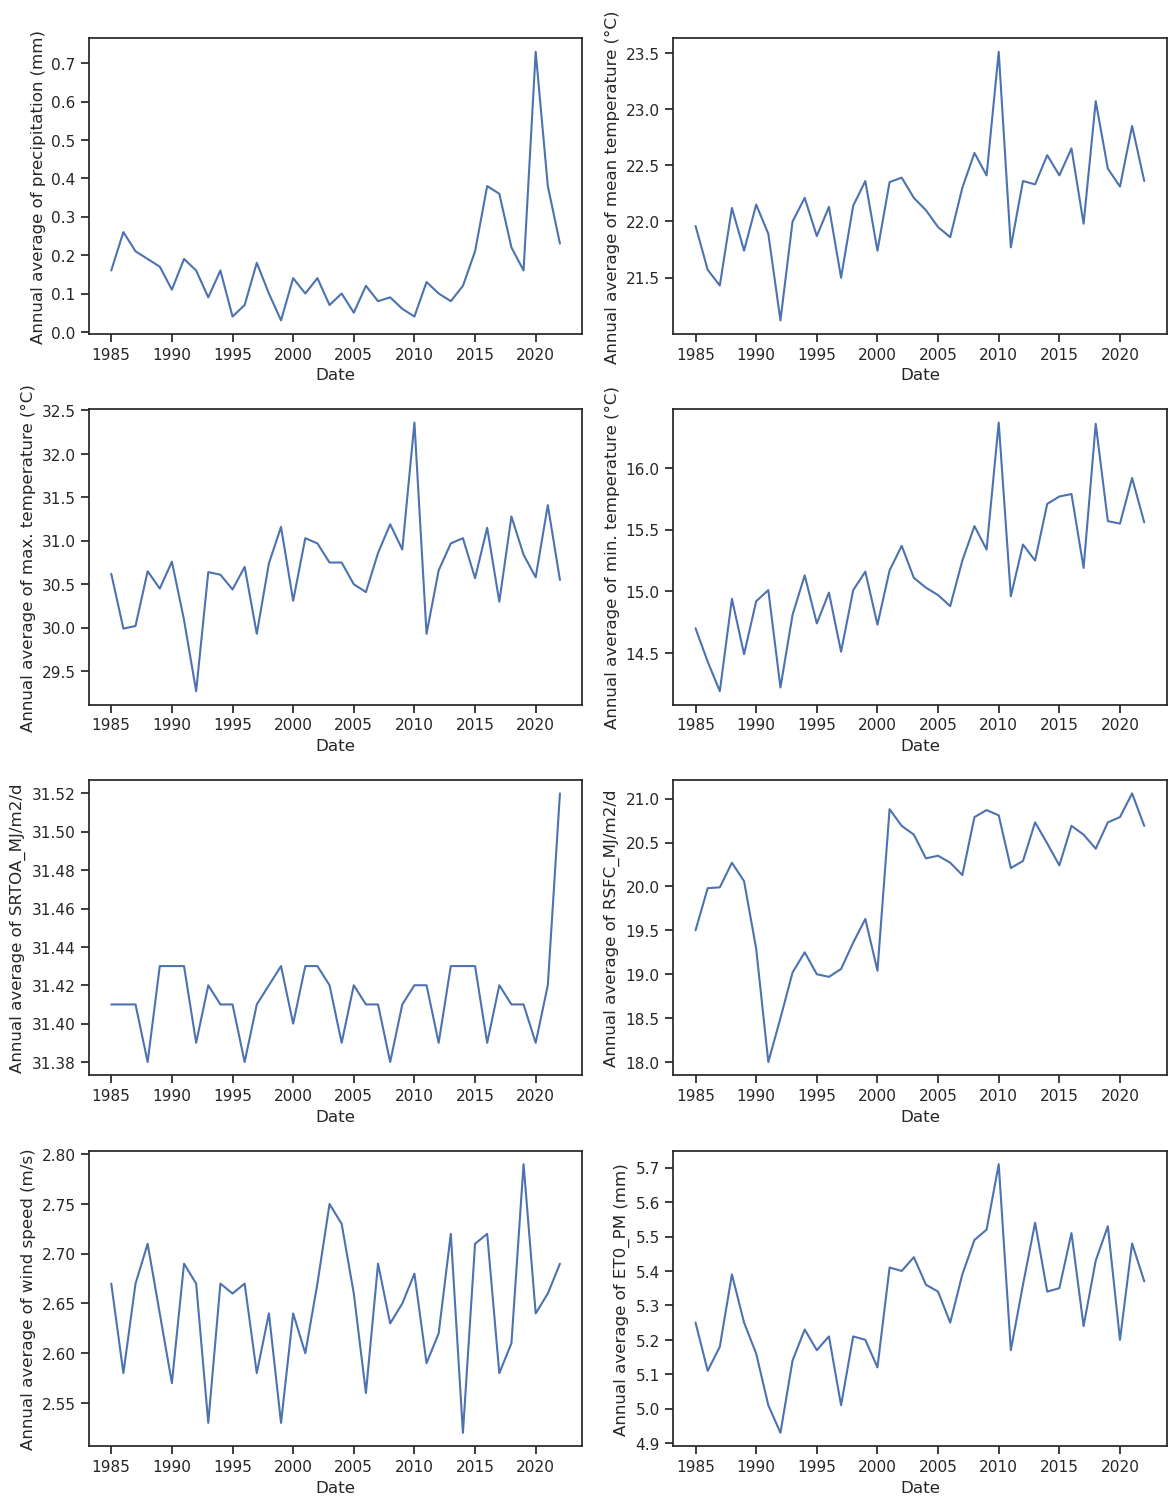

In [25]:
sns.set_style("ticks")
fig, ax = plt.subplots(nrows=4, ncols =2,figsize=(12,15))  # , sharex='all'

ax[0,0].plot(df1)
#ax[0,0].title.set_text('Annual average of precipitation (mm)')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Annual average of precipitation (mm)')
ax[0,1].plot(df2)
#ax[0,1].title.set_text('Annual average of mean temperature (°C)')
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Annual average of mean temperature (°C)')
ax[1,0].plot(df3)
#ax[1,0].title.set_text('Annual average of maximum temperature (°C)')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Annual average of max. temperature (°C)')
ax[1,1].plot(df4)
#ax[1,1].title.set_text('Annual average of minimum temperature (°C)')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Annual average of min. temperature (°C)')
ax[2,0].plot(df5)
#ax[2,0].title.set_text('Annual average of SRTOA_MJ/m2/d')
ax[2,0].set_xlabel('Date')
ax[2,0].set_ylabel('Annual average of SRTOA_MJ/m2/d')
ax[2,1].plot(df6)
#ax[2,1].title.set_text('Annual average of RSFC_MJ/m2/d')
ax[2,1].set_xlabel('Date')
ax[2,1].set_ylabel('Annual average of RSFC_MJ/m2/d')
ax[3,0].plot(df7)
#ax[3,0].title.set_text('Annual average of wind speed (m/s)')
ax[3,0].set_xlabel('Date')
ax[3,0].set_ylabel('Annual average of wind speed (m/s)')
ax[3,1].plot(df8)
#ax[3,1].title.set_text('Annual average of PM_ET0 (mm)')
ax[3,1].set_xlabel('Date')
ax[3,1].set_ylabel('Annual average of ET0_PM (mm)')
plt.tight_layout(pad=1.3)
plt.show()

In [26]:
ETo_PM.head()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
Date,,,,,,,,,
1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


In [27]:
Precipitation = ETo_PM.groupby(ETo_PM.index.year).sum()['PP_mm'].round(2)
Precipitation 

Date
1985     57.40
1986     93.91
1987     75.96
1988     69.70
1989     62.73
1990     39.18
1991     67.69
1992     59.57
1993     32.53
1994     57.60
1995     15.47
1996     24.42
1997     64.62
1998     36.20
1999     10.02
2000     51.62
2001     34.77
2002     51.79
2003     24.69
2004     34.94
2005     19.79
2006     42.78
2007     28.38
2008     34.76
2009     22.95
2010     14.79
2011     47.20
2012     35.27
2013     27.46
2014     43.77
2015     77.79
2016    137.64
2017    130.94
2018     79.01
2019     58.36
2020    266.46
2021    137.46
2022     83.40
Name: PP_mm, dtype: float64

In [28]:
Precipitation.describe()

count     38.000000
mean      59.290000
std       46.993232
min       10.020000
25%       33.087500
50%       49.410000
75%       69.197500
max      266.460000
Name: PP_mm, dtype: float64

In [29]:
Precipitation.sort_values(ascending=False)

Date
2020    266.46
2016    137.64
2021    137.46
2017    130.94
1986     93.91
2022     83.40
2018     79.01
2015     77.79
1987     75.96
1988     69.70
1991     67.69
1997     64.62
1989     62.73
1992     59.57
2019     58.36
1994     57.60
1985     57.40
2002     51.79
2000     51.62
2011     47.20
2014     43.77
2006     42.78
1990     39.18
1998     36.20
2012     35.27
2004     34.94
2001     34.77
2008     34.76
1993     32.53
2007     28.38
2013     27.46
2003     24.69
1996     24.42
2009     22.95
2005     19.79
1995     15.47
2010     14.79
1999     10.02
Name: PP_mm, dtype: float64

In [30]:
PM_ET0_mm = ETo_PM.groupby(ETo_PM.index.year).sum()['PM_ET0_mm'].round(2)
PM_ET0_mm

Date
1985    1915.35
1986    1866.38
1987    1889.68
1988    1973.07
1989    1914.47
1990    1882.73
1991    1827.40
1992    1805.28
1993    1875.42
1994    1907.13
1995    1888.84
1996    1905.19
1997    1827.87
1998    1903.06
1999    1898.38
2000    1872.59
2001    1974.67
2002    1970.72
2003    1985.98
2004    1961.97
2005    1948.79
2006    1917.89
2007    1966.59
2008    2010.45
2009    2013.15
2010    2085.82
2011    1886.08
2012    1960.23
2013    2021.36
2014    1950.56
2015    1951.19
2016    2016.41
2017    1911.08
2018    1981.69
2019    2018.67
2020    1904.75
2021    1998.75
2022    1958.27
Name: PM_ET0_mm, dtype: float64

In [31]:
ETo_PM['PP_mm'].value_counts()

0.00    10725
0.01      474
0.02      262
0.03      190
0.04      142
        ...  
5.01        1
2.52        1
1.59        1
4.75        1
3.63        1
Name: PP_mm, Length: 381, dtype: int64

In [32]:
PM_ET0_mm.describe()

count      38.000000
mean     1935.471316
std        61.583566
min      1805.280000
25%      1891.855000
50%      1933.340000
75%      1974.270000
max      2085.820000
Name: PM_ET0_mm, dtype: float64

In [33]:
PM_ET0_mm.sort_values(ascending=False)

Date
2010    2085.82
2013    2021.36
2019    2018.67
2016    2016.41
2009    2013.15
2008    2010.45
2021    1998.75
2003    1985.98
2018    1981.69
2001    1974.67
1988    1973.07
2002    1970.72
2007    1966.59
2004    1961.97
2012    1960.23
2022    1958.27
2015    1951.19
2014    1950.56
2005    1948.79
2006    1917.89
1985    1915.35
1989    1914.47
2017    1911.08
1994    1907.13
1996    1905.19
2020    1904.75
1998    1903.06
1999    1898.38
1987    1889.68
1995    1888.84
2011    1886.08
1990    1882.73
1993    1875.42
2000    1872.59
1986    1866.38
1997    1827.87
1991    1827.40
1992    1805.28
Name: PM_ET0_mm, dtype: float64

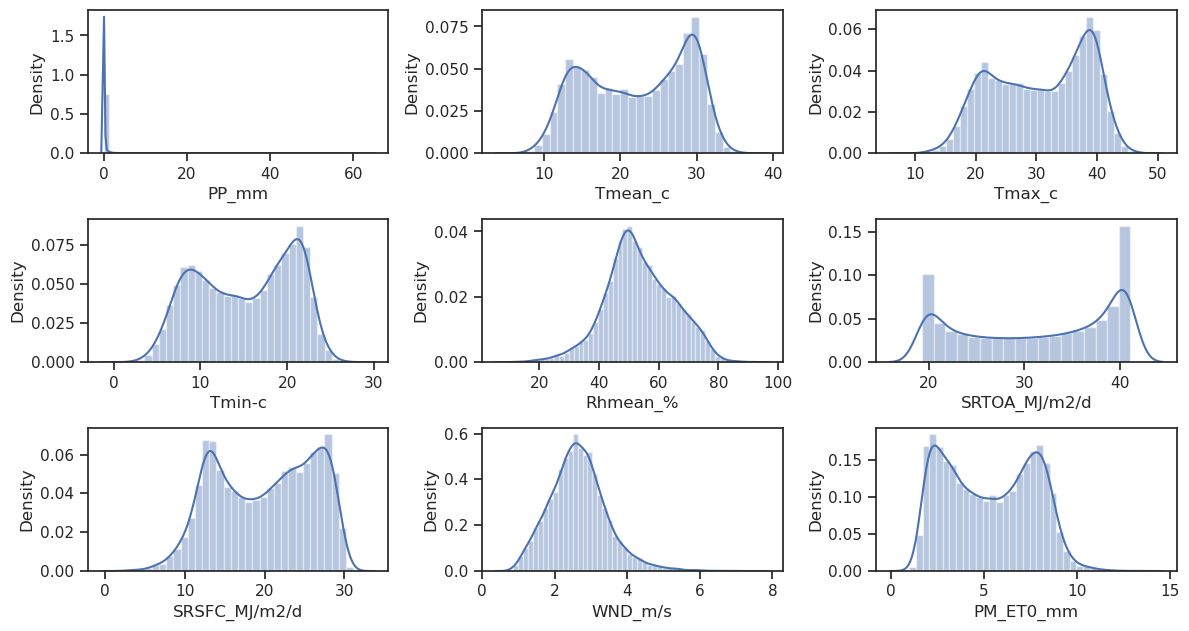

In [40]:
i =1
plt.figure(figsize=(12,8))
for col in ETo_PM.columns:
    if ETo_PM[col].dtype!='object':
        plt.subplot(4,3,i)
        sns.distplot(ETo_PM[col])
        i+=1
plt.tight_layout(pad=0.9)
plt.show()

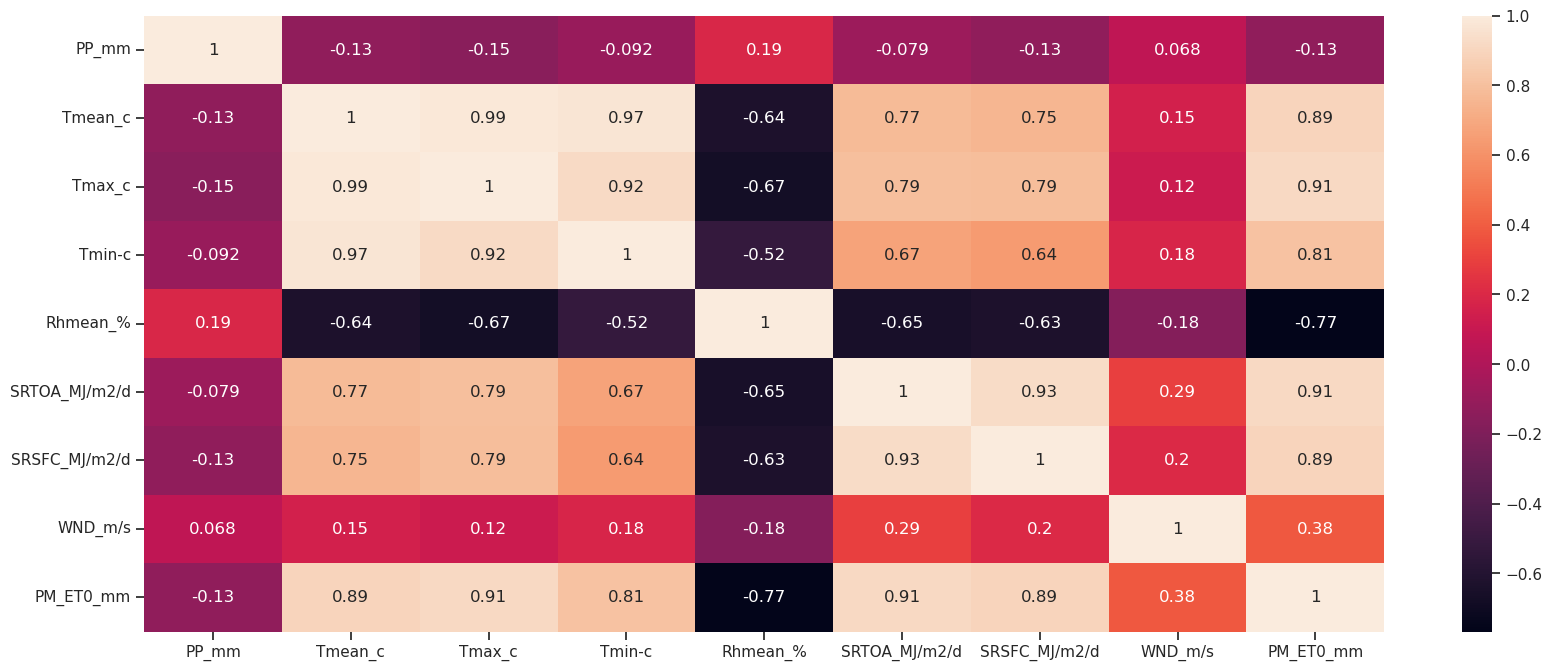

In [41]:
# correlation between variables
plt.figure(figsize=(20,8))

sns.heatmap(ETo_PM.corr(), annot=True)
plt.show()

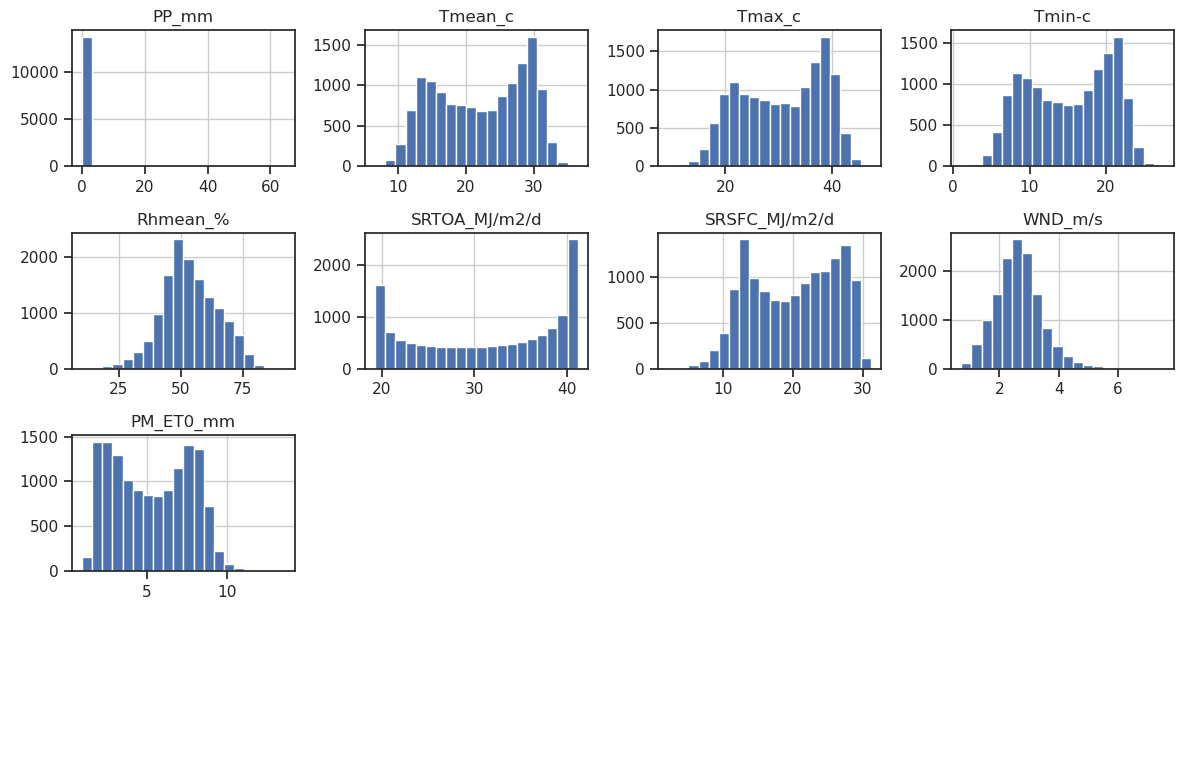

In [42]:
# visualize distribution of values for each variable with histogram
fig, axList = plt.subplots(4, 4, sharex=False, sharey=False)
axList = axList.flatten()
fig.set_size_inches(12, 8)

for ax in axList[len(ETo_PM.columns):]:
    ax.axis('off')

for i,ax in enumerate(axList[0:len(ETo_PM.columns)]):
    ETo_PM.hist(column = ETo_PM.columns[i], bins = 20, ax=ax)
            
fig.tight_layout()
fig.show()

In [43]:
ETo_PM.corr()['PM_ET0_mm'][:-1].sort_values()

Rhmean_%        -0.767566
PP_mm           -0.130126
WND_m/s          0.383682
Tmin-c           0.812498
SRSFC_MJ/m2/d    0.893621
Tmean_c          0.894897
Tmax_c           0.910358
SRTOA_MJ/m2/d    0.913197
Name: PM_ET0_mm, dtype: float64

sns.set_style("ETo_PM")
fig, ax = plt.subplots(4,2,figsize=(12,15))  # , sharex='all'

ax[0,0].sns.scatterplot(x="Rhmean_%",y="PM_ET0_mm", data=ETo_PM)
#ax[0,0].title.set_text('Annual average of precipitation (mm)')
ax[0,0].set_xlabel('Date')
ax[0,0].set_ylabel('Annual average of precipitation (mm)')
ax[0,1].plot(df2)
#ax[0,1].title.set_text('Annual average of mean temperature (°C)')
ax[0,1].set_xlabel('Date')
ax[0,1].set_ylabel('Annual average of mean temperature (°C)')
ax[1,0].plot(df3)
#ax[1,0].title.set_text('Annual average of maximum temperature (°C)')
ax[1,0].set_xlabel('Date')
ax[1,0].set_ylabel('Annual average of max. temperature (°C)')
ax[1,1].plot(df4)
#ax[1,1].title.set_text('Annual average of minimum temperature (°C)')
ax[1,1].set_xlabel('Date')
ax[1,1].set_ylabel('Annual average of min. temperature (°C)')
ax[2,0].plot(df5)
#ax[2,0].title.set_text('Annual average of SRTOA_MJ/m2/d')
ax[2,0].set_xlabel('Date')
ax[2,0].set_ylabel('Annual average of SRTOA_MJ/m2/d')
ax[2,1].plot(df6)
#ax[2,1].title.set_text('Annual average of RSFC_MJ/m2/d')
ax[2,1].set_xlabel('Date')
ax[2,1].set_ylabel('Annual average of RSFC_MJ/m2/d')
ax[3,0].plot(df7)
#ax[3,0].title.set_text('Annual average of wind speed (m/s)')
ax[3,0].set_xlabel('Date')
ax[3,0].set_ylabel('Annual average of wind speed (m/s)')
ax[3,1].plot(df8)
#ax[3,1].title.set_text('Annual average of PM_ET0 (mm)')
ax[3,1].set_xlabel('Date')
ax[3,1].set_ylabel('Annual average of ET0_PM (mm)')
plt.tight_layout(pad=1.3)
plt.show()

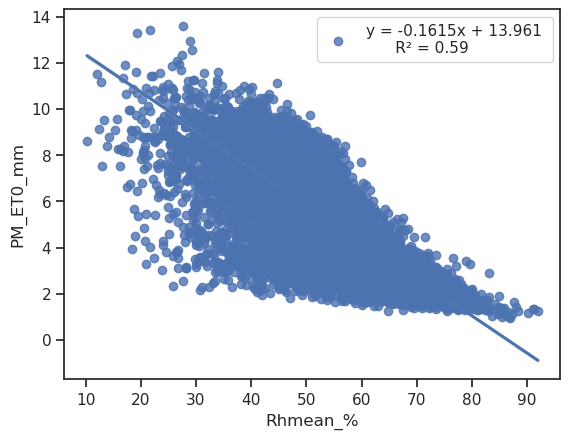

In [101]:
sns.regplot(x ='Rhmean_%', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = -0.1615x + 13.961 \n      R² = 0.59')
plt.xlabel = 'RH mean_%'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()


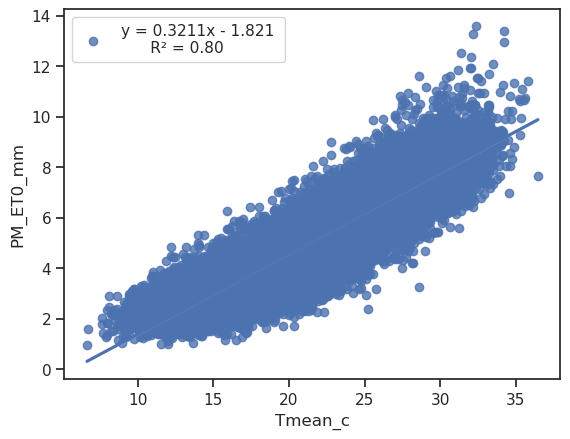

In [100]:
sns.regplot(x ='Tmean_c', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 0.3211x - 1.821 \n      R² = 0.80')
plt.xlabel = 'Tmean_c'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

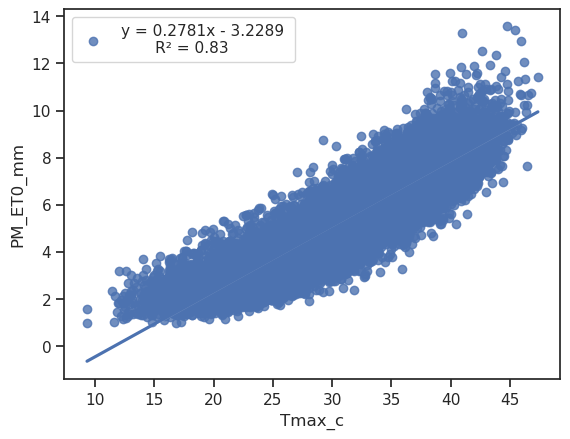

In [103]:
sns.regplot(x ='Tmax_c', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 0.2781x - 3.2289 \n       R² = 0.83')
plt.xlabel = 'Tmax_c'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

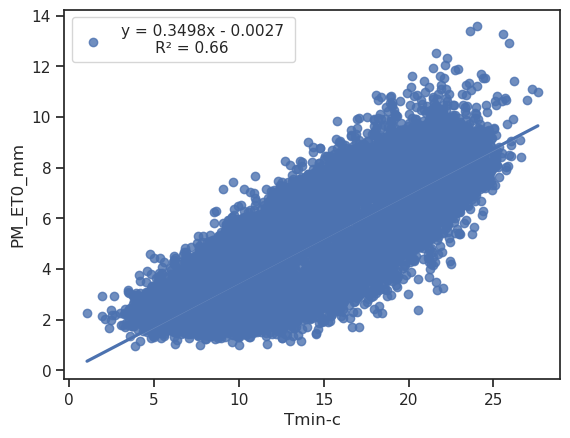

In [105]:
sns.regplot(x ='Tmin-c', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 0.3498x - 0.0027 \n       R² = 0.66')
plt.xlabel = 'Tmin-c'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

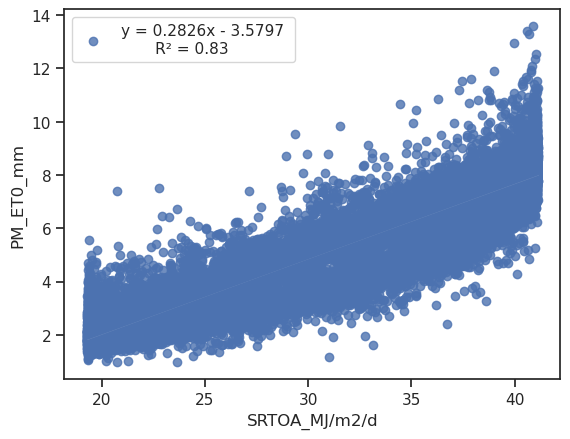

In [106]:
sns.regplot(x ='SRTOA_MJ/m2/d', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 0.2826x - 3.5797 \n       R² = 0.83')
plt.xlabel = 'SRTOA_MJ/m2/d'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

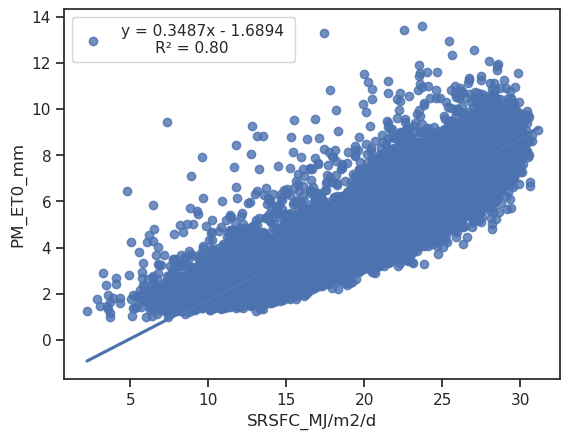

In [107]:
sns.regplot(x ='SRSFC_MJ/m2/d', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 0.3487x - 1.6894 \n       R² = 0.80')
plt.xlabel = 'SRSFC_MJ/m2/d'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

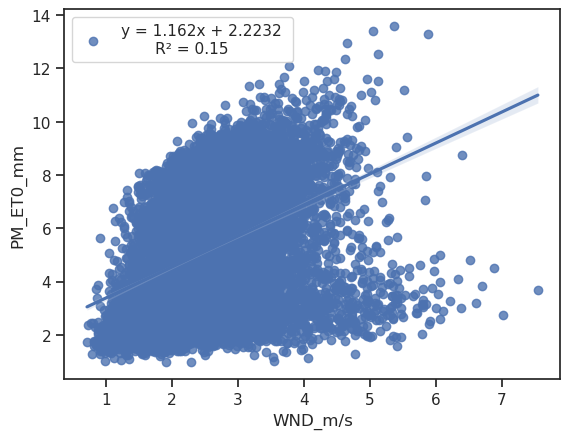

In [108]:
sns.regplot(x ='WND_m/s', y= 'PM_ET0_mm',data= ETo_PM, label = 'y = 1.162x + 2.2232 \n       R² = 0.15')
plt.xlabel = 'WND_m/s'
plt.ylabel = 'PM_ET0_mm'
plt.legend()
#plt.title('The relationship between relative humidity (%) and PM_ET0_mm ')
plt.show()

In [ ]:
sns.lmplot(x='SRTOA_MJ/m2/d',
y='PM_ET0_mm',
data=ETo_PM,
ci=None)
plt.show()

In [109]:
ETo_PM['PM_ET0_mm'].sort_values(ascending = False) 

Date
2014-06-04    13.58
2015-05-27    13.40
2003-05-29    13.29
2016-05-15    12.94
2007-06-10    12.54
              ...  
1997-12-18     1.04
2002-01-09     1.03
2003-01-19     1.01
2017-01-14     0.99
1993-02-03     0.97
Name: PM_ET0_mm, Length: 13879, dtype: float64

# The outliers

<AxesSubplot:>

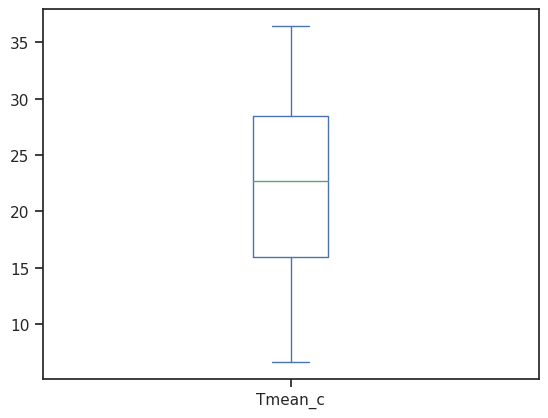

In [111]:
ETo_PM['Tmean_c'].plot(kind= 'box')

<AxesSubplot:>

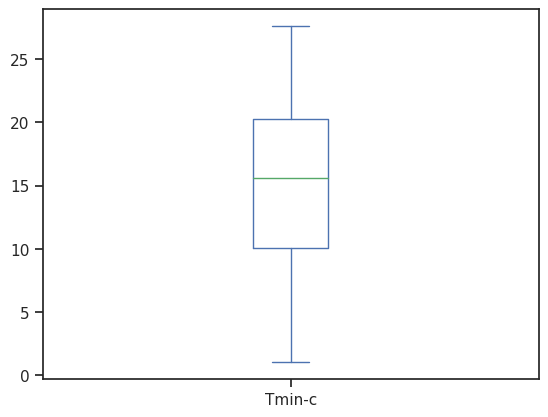

In [112]:
ETo_PM['Tmin-c'].plot(kind= 'box')

<AxesSubplot:>

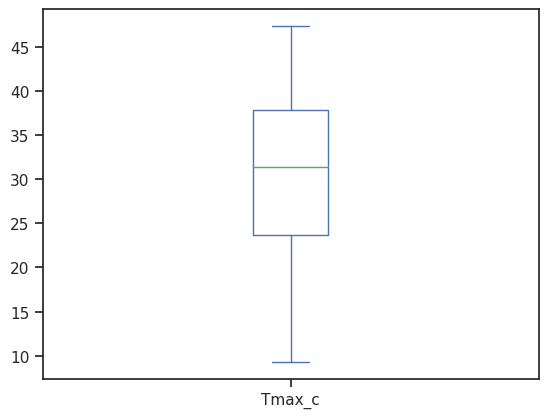

In [113]:
ETo_PM['Tmax_c'].plot(kind= 'box')

<AxesSubplot:>

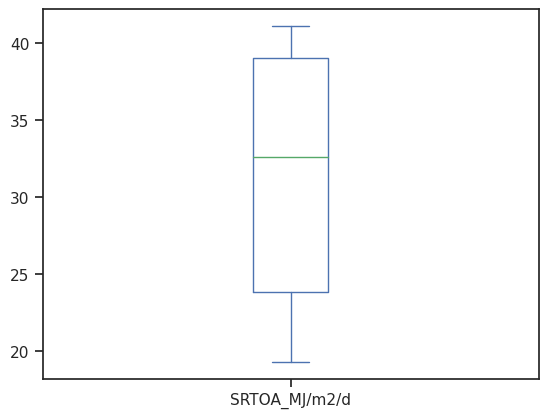

In [114]:
ETo_PM['SRTOA_MJ/m2/d'].plot(kind= 'box')

<AxesSubplot:>

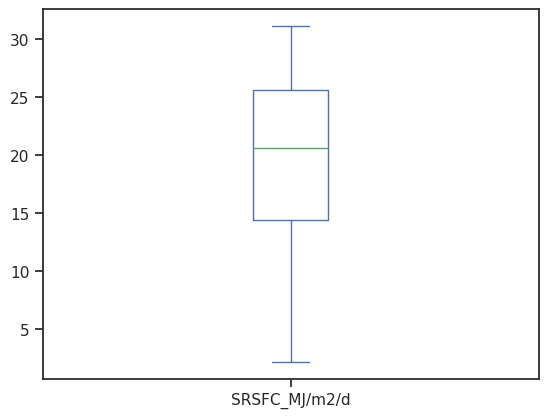

In [115]:
ETo_PM['SRSFC_MJ/m2/d'].plot(kind= 'box')

<AxesSubplot:>

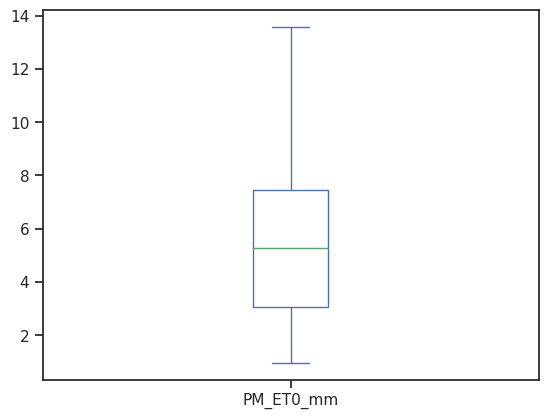

In [116]:
ETo_PM['PM_ET0_mm'].plot(kind= 'box')

<AxesSubplot:>

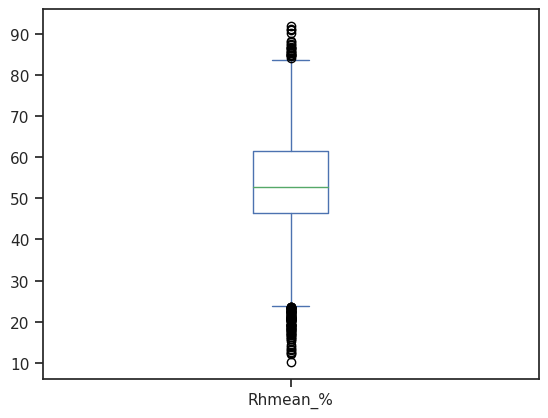

In [117]:
ETo_PM['Rhmean_%'].plot(kind= 'box')

In [118]:
ETo_PM.reset_index(inplace=True)
ETo_PM.index

RangeIndex(start=0, stop=13879, step=1)

In [119]:
def check_outliers(col,ETo_PM):
    q1 = ETo_PM[col].quantile(0.25)
    q3 = ETo_PM[col].quantile(0.75)
    IQR = q3-q1
    
    
    lower_b = q1-1.5*IQR
    upper_b = q3+1.5*IQR
    
    outlier=[]
    for i in range(len(ETo_PM)):
        if ETo_PM.loc[i, col]> upper_b or ETo_PM.loc[i, col]< lower_b:
            outliers.append(ETo_PM.loc[i,col])
            
    return outliers

In [120]:
def handle_outliers(ETo_PM):
    q1 = ETo_PM['Rhmean_%'].quantile(0.25)
    q3 = ETo_PM['Rhmean_%'].quantile(0.75)
    IQR = q3-q1
    
    
    lower_b = q1-1.5*IQR
    upper_b = q3+1.5*IQR
    
    for i in range(len(ETo_PM)):
        if ETo_PM.loc[i, 'Rhmean_%']> upper_b:
            ETo_PM.loc[i,'Rhmean_%'] = upper_b
        elif ETo_PM.loc[i, 'Rhmean_%']< lower_b:
            ETo_PM.loc[i,'Rhmean_%'] = lower_b
            
handle_outliers(ETo_PM)

<AxesSubplot:>

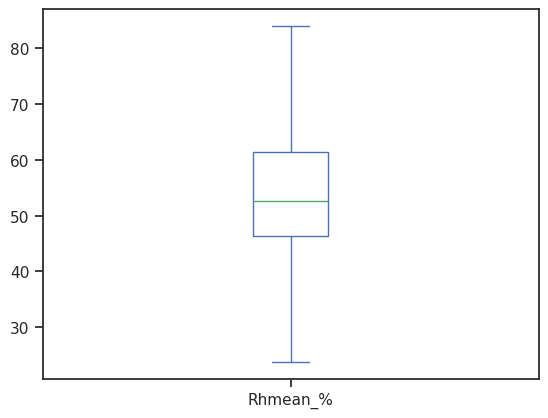

In [121]:
ETo_PM['Rhmean_%'].plot(kind= 'box')

<AxesSubplot:>

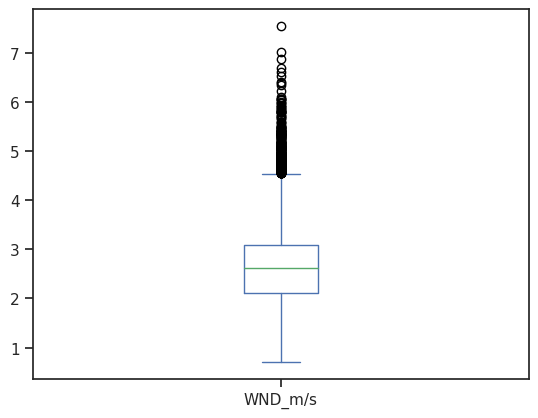

In [122]:
ETo_PM['WND_m/s'].plot(kind= 'box')

In [123]:
def handle_outliers(ETo_PM):
    q1 = ETo_PM['WND_m/s'].quantile(0.25)
    q3 = ETo_PM['WND_m/s'].quantile(0.75)
    IQR = q3-q1
    
    
    lower_b = q1-1.5*IQR
    upper_b = q3+1.5*IQR
    
    for i in range(len(ETo_PM)):
        if ETo_PM.loc[i, 'WND_m/s']> upper_b:
            ETo_PM.loc[i,'WND_m/s'] = upper_b
        elif ETo_PM.loc[i, 'WND_m/s']< lower_b:
            ETo_PM.loc[i,'WND_m/s'] = lower_b
            
handle_outliers(ETo_PM)

<AxesSubplot:>

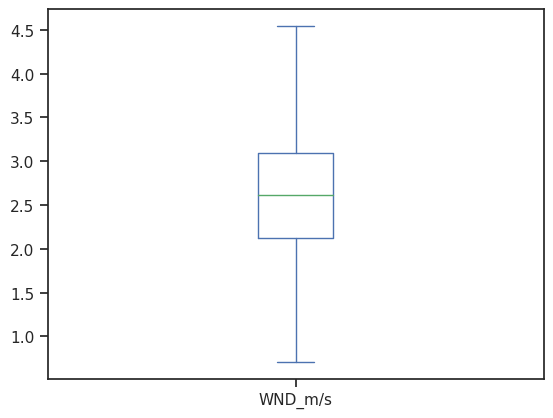

In [124]:
ETo_PM['WND_m/s'].plot(kind= 'box')

In [125]:
ETo_PM.set_index(ETo_PM['Date'], inplace = True)

In [126]:
ETo_PM.drop(['Date'], inplace=True, axis=1)

In [127]:
ETo_PM.head()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm
Date,,,,,,,,,
1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71
1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23
1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42
1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43
1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29


## Machine learning models

In [128]:
ETo_PM['target'] = ETo_PM.shift(-1)['PM_ET0_mm']

In [129]:
ETo_PM.head()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm,target
Date,,,,,,,,,,
1985-01-01,0.0,10.62,17.72,5.23,41.31,19.61,13.00,2.33,2.71,3.23
1985-01-02,0.0,11.01,18.65,4.84,50.00,19.67,13.10,4.05,3.23,2.42
1985-01-03,0.0,9.98,17.39,4.74,58.00,19.73,13.52,2.94,2.42,2.43
1985-01-04,0.0,10.01,18.69,3.53,48.50,19.80,12.67,2.12,2.43,2.29
1985-01-05,0.0,11.00,19.77,3.63,44.94,19.87,13.31,1.60,2.29,2.05


In [130]:
ETo_PM.tail()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm,target
Date,,,,,,,,,,
2022-12-27,0.00,15.22,22.32,10.37,61.62,19.49,11.73,2.05,2.33,1.81
2022-12-28,0.00,14.75,21.16,10.25,56.44,19.52,11.97,1.01,1.81,1.83
2022-12-29,0.00,14.76,21.83,8.76,60.56,19.56,12.13,1.12,1.83,1.87
2022-12-30,1.13,15.54,21.53,11.10,73.44,19.60,11.36,1.85,1.87,2.33
2022-12-31,0.00,15.19,22.30,10.23,70.06,19.64,12.15,2.83,2.33,NaN


In [131]:
ETo_PM['target'].fillna(ETo_PM['target'].median(), inplace = True)

In [132]:
ETo_PM.tail()

,PP_mm,Tmean_c,Tmax_c,Tmin-c,Rhmean_%,SRTOA_MJ/m2/d,SRSFC_MJ/m2/d,WND_m/s,PM_ET0_mm,target
Date,,,,,,,,,,
2022-12-27,0.00,15.22,22.32,10.37,61.62,19.49,11.73,2.05,2.33,1.81
2022-12-28,0.00,14.75,21.16,10.25,56.44,19.52,11.97,1.01,1.81,1.83
2022-12-29,0.00,14.76,21.83,8.76,60.56,19.56,12.13,1.12,1.83,1.87
2022-12-30,1.13,15.54,21.53,11.10,73.44,19.60,11.36,1.85,1.87,2.33
2022-12-31,0.00,15.19,22.30,10.23,70.06,19.64,12.15,2.83,2.33,5.27


# Model 1 = Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [134]:
predictors = ['PP_mm', 'Tmean_c', 'Tmax_c', 'Tmin-c', 'Rhmean_%', 'SRTOA_MJ/m2/d', 'SRSFC_MJ/m2/d', 'WND_m/s', 'PM_ET0_mm']

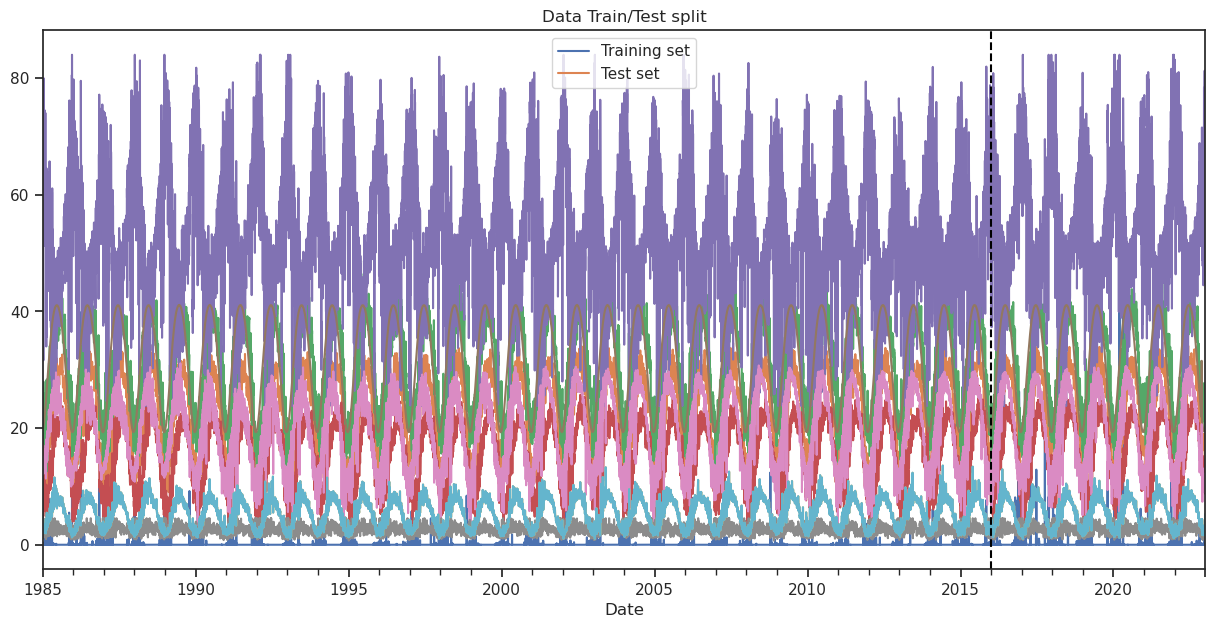

In [135]:
train = ETo_PM.loc[: '2015-12-31']
test = ETo_PM.loc['2016-01-01':]

fig, ax = plt.subplots(figsize = (15,7))
train.plot(ax=ax, label='Training set', title = 'Data Train/Test split')
test.plot(ax=ax, label = 'Test set')
ax.axvline('2016-01-01', color='black', ls ='--')
ax.legend(['Training set', 'Test set'])
plt.show()

In [136]:
train.shape

(11322, 10)

In [137]:
test.shape

(2557, 10)

In [138]:
X_train = train[predictors]
y_train = train['target']
X_test = test[predictors]
y_test = test['target']

In [139]:
from sklearn.preprocessing import StandardScaler
sd= StandardScaler()
X_train = sd.fit_transform(X_train)
X_test =sd.transform(X_test)

In [140]:
model1.fit(X_train, y_train)

LinearRegression()

In [141]:
y_pred = model1.predict(X_test)

In [142]:
model1.coef_

array([ 0.00966623,  2.67807057, -0.95986401, -1.1359002 , -0.04836842,
        0.67964443,  0.16491627, -0.06936588,  0.84802156])

In [143]:
model1.intercept_

5.278029500088325

In [144]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
print('MSE:', mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

MSE: 0.4109416649633662
MAE: 0.45715017491203597
R2 score: 0.9338511764921863


In [145]:
combined = pd.concat([y_test, pd.Series(y_pred, index=test.index)], axis=1)
combined.columns = ['Actual', 'Predictions']
combined

,Actual,Predictions
Date,,
2016-01-01,1.95,1.658627
2016-01-02,1.97,1.632085
2016-01-03,2.59,1.772206
2016-01-04,3.60,2.038310
2016-01-05,3.78,2.546430
...,...,...
2022-12-27,1.81,2.162648
2022-12-28,1.83,2.080851
2022-12-29,1.87,2.298108


<AxesSubplot:xlabel='Date'>

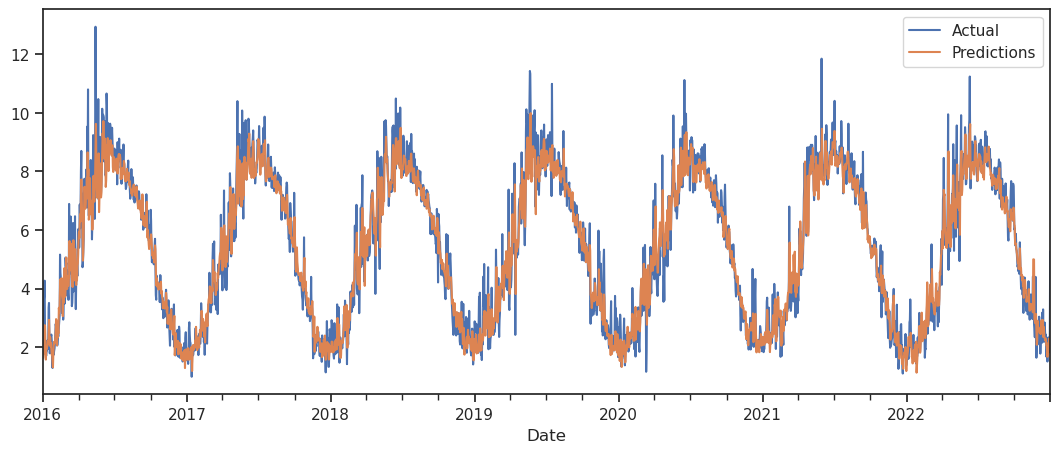

In [146]:
combined.plot(figsize =(13,5))

In [150]:
ETo_PM.corr()['target'][:-1].sort_values(ascending=True)

Rhmean_%        -0.721738
PP_mm           -0.122465
WND_m/s          0.271039
Tmin-c           0.780182
Tmean_c          0.874299
SRSFC_MJ/m2/d    0.890255
Tmax_c           0.890390
SRTOA_MJ/m2/d    0.916649
PM_ET0_mm        0.944021
Name: target, dtype: float64

In [151]:
combined['diff'] = (combined['Actual'] - combined['Predictions']).abs()

In [152]:
combined.sort_values('diff', ascending=False)

,Actual,Predictions,diff
Date,,,
2016-05-14,12.94,8.661143,4.278857
2022-04-17,4.64,8.684112,4.044112
2019-04-14,2.42,6.005023,3.585023
2022-04-16,9.95,6.620535,3.329465
2022-12-31,5.27,2.098128,3.171872
...,...,...,...
2017-06-25,8.04,8.041120,0.001120
2019-09-01,7.25,7.249207,0.000793
2018-12-21,2.24,2.239527,0.000473


# Model2 = XGBoost


In [158]:
import xgboost as xgb

In [168]:
model2 = xgb.XGBRFRegressor(n_estimators=1000)
model2.fit(X_train, y_train,
         eval_set=[(X_train, y_train), (X_test, y_test)],
         verbose = True)

[0]	validation_0-rmse:0.59312	validation_1-rmse:0.64303


XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=1000, n_jobs=0, num_parallel_tree=1000,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [169]:
y_pred = model2.predict(X_test)

In [170]:
print('MSE:', mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MSE: 0.41349251970597367
MAE : 0.44863236009212126
R2 score 0.9334405682366865


# Model3 = Decision Tree

In [171]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(min_samples_split=15, max_depth=7, max_features = 5)
model3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, max_features=5, min_samples_split=15)

In [172]:
y_pred = model3.predict(X_test)

In [173]:
print('MSE:', mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MSE: 0.49780799466540315
MAE : 0.48593014399593554
R2 score 0.9198683998546706


# Model4 = Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)

RandomForestRegressor()

In [175]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50,60,100],
        'min_samples_split':[2,3,4,5],
        'max_depth': [5,6,7,8]}

In [176]:
grid_s = GridSearchCV(estimator=model4, param_grid = param, cv = 5, scoring='neg_mean_squared_error')
grid_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 60, 100]},
             scoring='neg_mean_squared_error')

In [178]:
GridSearchCV(cv=5, estimator= RandomForestRegressor(),
            param_grid={'max_dapth': [8],
                       'min_samples_split': [3],
                       'n_estimator': [100]},
            scoring = 'neg_mean_squared_error')

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_dapth': [8], 'min_samples_split': [3],
                         'n_estimator': [100]},
             scoring='neg_mean_squared_error')

In [179]:
grid_s.best_params_

{'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 60}

In [181]:
model4 = RandomForestRegressor(**grid_s.best_params_)
model4.fit(X_train, y_train)
y_pred_tr = model4.predict(X_train)
print('MSE on Train :', mean_squared_error(y_train, y_pred_tr))
print('R2 on train :', model4.score(X_train, y_train)) 
y_pred = model4.predict(X_train)
print('MSE on test :', mean_squared_error(y_test, y_pred))
print('R2 on test :', model4.score(y_test, y_pred))

MSE on Train : 0.27085090607287743
R2 on train : 0.9513509506200117


ValueError: Found input variables with inconsistent numbers of samples: [2557, 11322]

# Model 5 = KNN 

In [187]:
from sklearn.neighbors import KNeighborsRegressor
model5 = KNeighborsRegressor()
model5.fit(X_train, y_train)

KNeighborsRegressor()

In [188]:
y_pred = model5.predict(X_test)

In [185]:
print('MSE:', mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MSE: 0.451347052014079
MAE : 0.4746992569417286
R2 score 0.9273471662039602


# Model6 = Support Vector regression

In [191]:
from sklearn.svm import SVR

In [192]:
model6 = SVR(kernel = 'rbf')
model6.fit(X_train, y_train)

SVR()

In [193]:
y_pred = model6.predict(X_test)

In [194]:
print('MSE:', mean_squared_error(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print('R2 score', r2_score(y_test, y_pred))

MSE: 0.3867776302878225
MAE : 0.4309231039621036
R2 score 0.9377408343226517
